In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path="https://raw.githubusercontent.com/DeboraMandon/video_game_sales_analysis/main/vgsales.csv"
df=pd.read_csv(path, index_col=0)
df.head()



Name Platform    Year         Genre Publisher  \
Rank                                                                      
1                   Wii Sports      Wii  2006.0        Sports  Nintendo   
2            Super Mario Bros.      NES  1985.0      Platform  Nintendo   
3               Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
4            Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
Rank                                                           
1        41.49     29.02      3.77         8.46         82.74  
2        29.08      3.58      6.81         0.77         40.24  
3        15.85     12.88      3.79         3.31         35.82  
4        15.75     11.01      3.28         2.96         33.00  
5        11.27      8.89     10.22         1.00         31.37

In [2]:
# TYPE DE VARIABLE

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None


In [3]:
var_cat=['Name', 'Platform','Genre', 'Publisher']
var_num=['Year', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

In [4]:
# TAUX DE NA

print(df.isna().sum())
#pourcentage de valeur nulle pour la variable Year
Year_Na=(df['Year'].isna().sum())/(len(df['Year']))
Year_Na=Year_Na*100
print('Year',round(Year_Na,2),'%')

#pourcentage de valeur nulle pour la variable Publisher
Year_Na=(df['Publisher'].isna().sum())/(len(df['Publisher']))
Year_Na=Year_Na*100
print('Publisher',round(Year_Na,2),'%')

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Year 1.63 %
Publisher 0.35 %


In [5]:
# DISTRIBUTION DES VALEURS

print(df.describe())
print(df.describe(include='O'))

               Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16327.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    2006.406443      0.264667      0.146652      0.077782      0.048063   
std        5.828981      0.816683      0.505351      0.309291      0.188588   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  
                               Name Platform   Genre        Publisher
count               

In [6]:
# ETENDUE DES VALEURS

print(df['Platform'].unique())
print(df['Year'].unique())
print(df['Genre'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


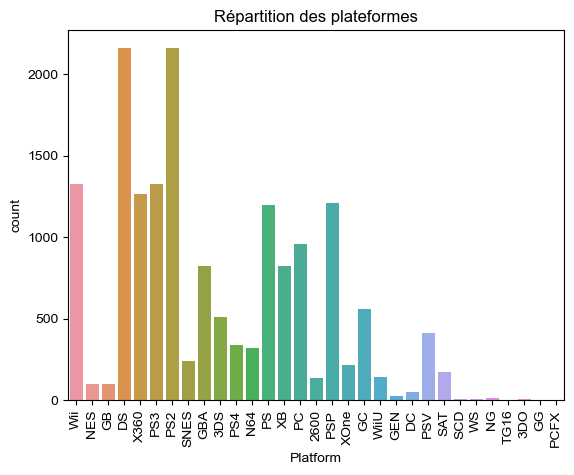

In [7]:
# RELATION ENTRE LES VALEURS

sns.countplot(x=df['Platform'])
sns.set_theme(style="darkgrid")

plt.xticks(rotation=90)
plt.title("Répartition des plateformes");

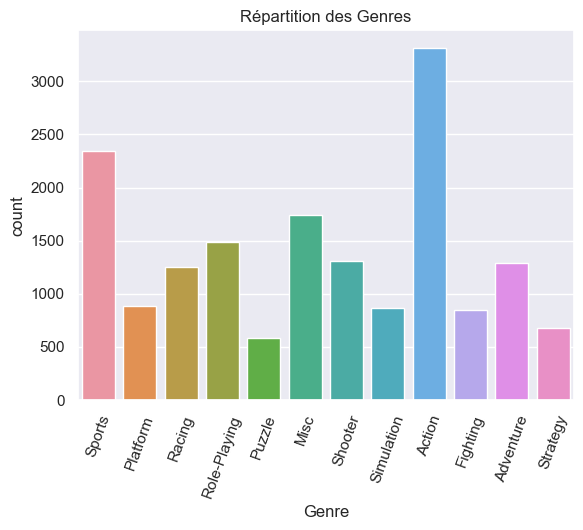

In [8]:
sns.countplot(x=df['Genre'])
sns.set_theme(style="darkgrid")

plt.xticks(rotation=70)
plt.title("Répartition des Genres");

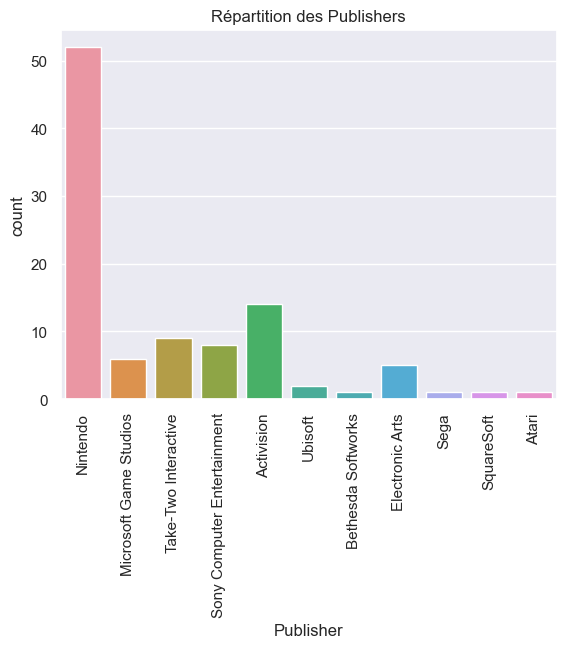

In [9]:
sns.countplot(x=df['Publisher'][:100])
sns.set_theme(style="darkgrid")

plt.xticks(rotation=90)
plt.title("Répartition des Publishers");

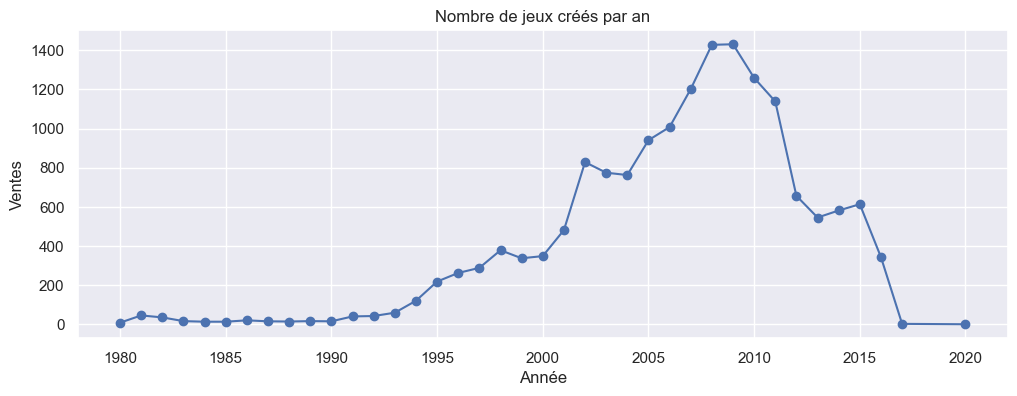

In [10]:
# ETUDE DE LA VARIABLE ANNEE

df['Year']=pd.to_datetime(df['Year'], format='%Y')

values = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
plt.plot_date(values.index, values, linestyle='-')
plt.xlabel('Année')
plt.ylabel('Ventes')
plt.title("Nombre de jeux créés par an");

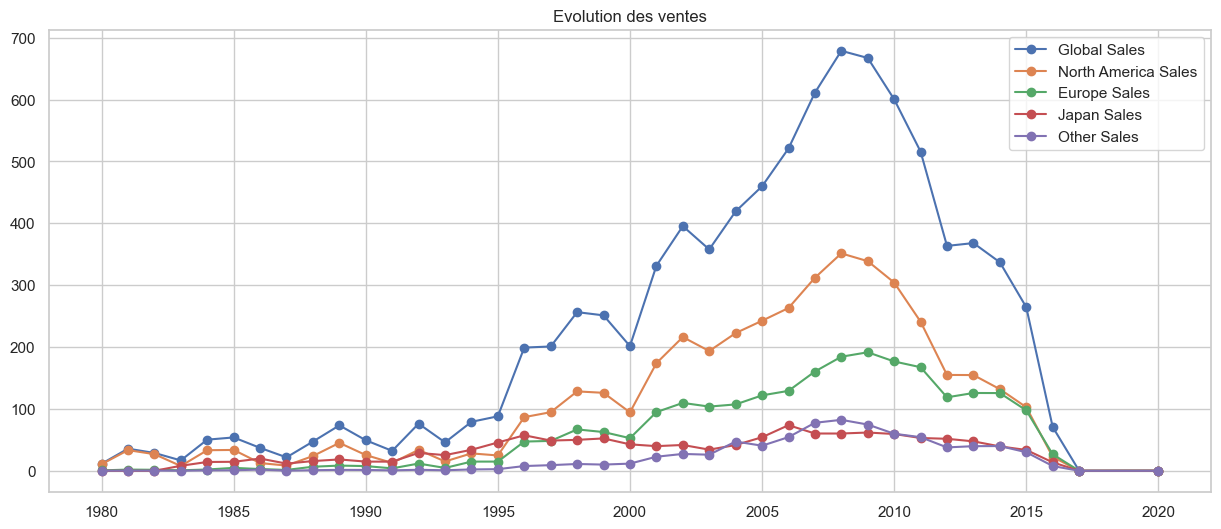

In [11]:

# ETUDE DES VARIABLES NUMERIQUES

for i in var_num:
    df['cat_'+i]=pd.qcut(df[i], q=[0,.25,.5,.75,1.], duplicates='drop')

df['Year']=pd.to_datetime(df['Year'], format='%Y')

sales_per_year=df.groupby('Year', as_index=False).agg({'NA_Sales':sum, 'EU_Sales':sum, 'JP_Sales':sum, 'Other_Sales':sum,'Global_Sales':sum})

sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['Global_Sales'].values,
              xdate=True,
              ls='-',
              label='Global Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['NA_Sales'].values,
              xdate=True,
              ls='-',
              label='North America Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['EU_Sales'].values,
              xdate=True,
              ls='-',
              label='Europe Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['JP_Sales'].values,
              xdate=True,
              ls='-',
              label='Japan Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['Other_Sales'].values,
              xdate=True,
              ls='-',
              label='Other Sales')
plt.legend(loc='best')
plt.title('Evolution des ventes')
plt.show();

In [12]:
# ANALYSE DE LA TENDANCE DES VENTES GLOBALES

# Calcul des ventes totales
total_sales = df.groupby('Year')['Global_Sales'].sum()

# Calcul des ventes totales cumulées
cumulative_total_sales = total_sales.cumsum()

# Affichage de la série temporelle
plt.plot_date(cumulative_total_sales.index, cumulative_total_sales.values);
plt.title('Tendance des ventes Globales');

In [13]:
# ETUDE DES VARIABLES NUMERIQUES

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(10,20),sharex=True, sharey=True)

sns.distplot(x=df['Global_Sales'].head(100), ax=ax1);
ax1.set_title('Top 20 Global Sales Distribution')

sns.distplot(x=df['NA_Sales'].head(100), ax=ax2);
ax2.set_title('Top 20 NA Sales Distribution')

sns.distplot(x=df['EU_Sales'].head(100), ax=ax3);
ax3.set_title('Top 20 EU Sales Distribution')

sns.distplot(x=df['JP_Sales'].head(100), ax=ax4);
ax4.set_title('Top 20 JP Sales Distribution')

sns.distplot(x=df['Other_Sales'].head(100), ax=ax5);
ax5.set_title('Top 20 Other Sales Distribution');

fig.suptitle('Distribution des ventes');



c:\Users\debor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\debor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\debor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

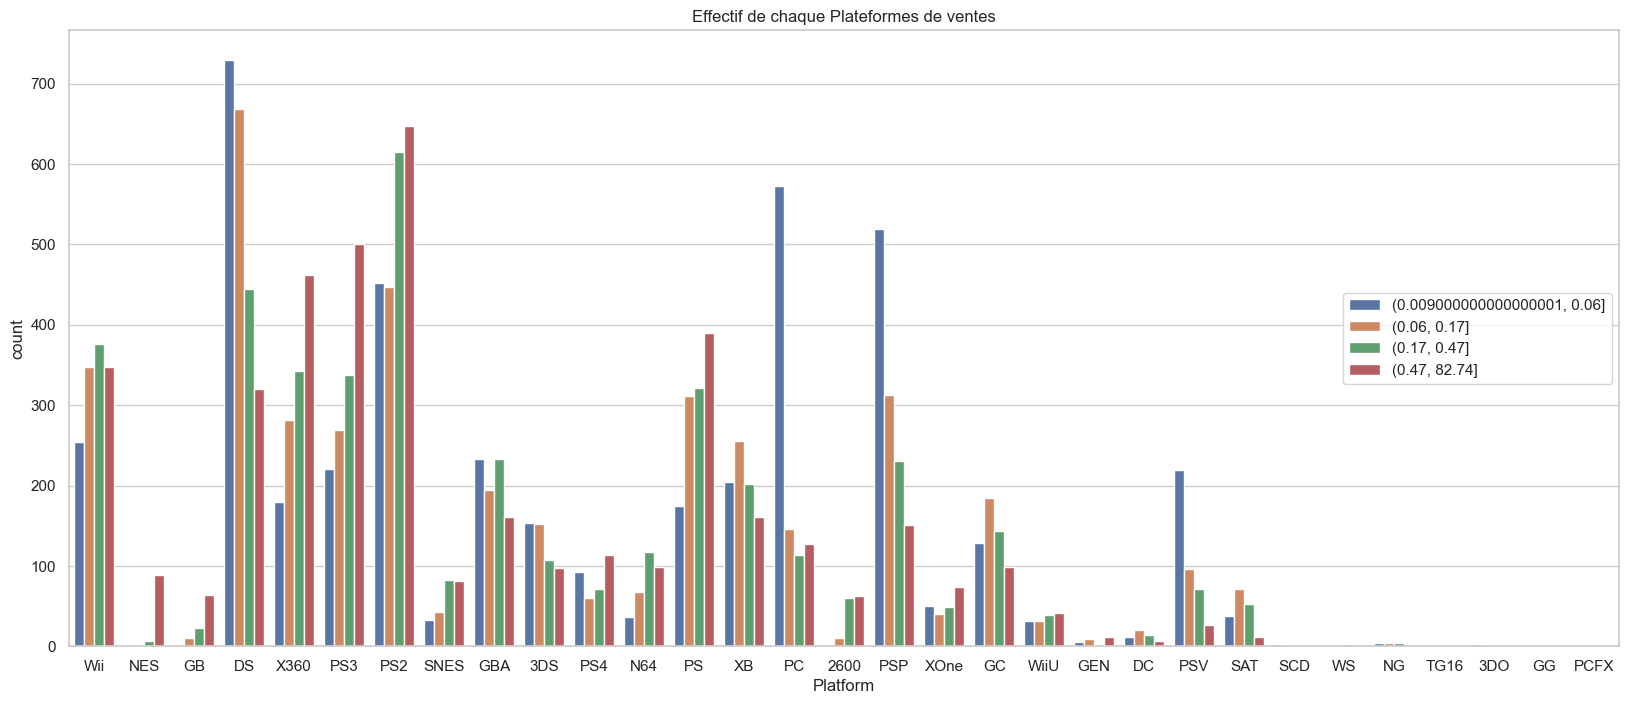

In [14]:
#PLATEFORMES

plt.figure(figsize=(20,8))
plt.title('Effectif de chaque Plateformes de ventes')

sns.countplot(x = 'Platform', hue = 'cat_Global_Sales', data = df)
plt.legend(loc='right');

In [15]:
#GENRE

plt.figure(figsize=(20,8))
plt.title('Effectif de chaque Genre de ventes')

sns.countplot(x = 'Genre', hue = 'cat_Global_Sales', data = df);

In [16]:
# TEST DE CORRELATION ENTRE LES VARIABLES NUMERIQUES
from pandas.plotting import scatter_matrix
%matplotlib inline

df.corr()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.767727  0.449787     0.634737      0.941047
EU_Sales      0.767727  1.000000  0.435584     0.726385      0.902836
JP_Sales      0.449787  0.435584  1.000000     0.290186      0.611816
Other_Sales   0.634737  0.726385  0.290186     1.000000      0.748331
Global_Sales  0.941047  0.902836  0.611816     0.748331      1.000000

In [17]:
# TEST DE CORRELATION ENTRE LES VARIABLES QUALITATIVES
table = pd.crosstab(df['Genre'], df['Publisher'])

table

Publisher     10TACLE Studios  1C Company  20th Century Fox Video Games  \
Genre                                                                     
Action                      0           0                             4   
Adventure                   1           0                             0   
Fighting                    0           0                             0   
Misc                        0           0                             0   
Platform                    0           0                             0   
Puzzle                      1           0                             0   
Racing                      0           1                             0   
Role-Playing                0           1                             0   
Shooter                     0           0                             1   
Simulation                  0           0                             0   
Sports                      0           0                             0   
Strategy                    1           1                             0   

Publisher     2D Boy  3DO  49Games  505 Games  5pb  7G//AMES  989 Sports  ...  \
Genre                                                                     ...   
Action             0   17        0         21    5         0           0  ...   
Adventure          0    3        0          7   49         0           0  ...   
Fighting           0    1        0         11    1         0           0  ...   
Misc               0    0        0         31    0         1           0  ...   
Platform           0    1        0          6    0         0           0  ...   
Puzzle             1    1        0         15    0         1           0  ...   
Racing             0    0        0          2    0         0           0  ...   
Role-Playing       0    1        0         10    1         0           0  ...   
Shooter            0    5        0         18    3         0           0  ...   
Simulation         0    0        0         41    2         2           0  ...   
Sports             0    6        1         27    0         0           1  ...   
Strategy           0    1        0          3    0         0           0  ...   

Publisher     Zushi Games  bitComposer Games  dramatic create  fonfun  iWin  \
Genre                                                                         
Action                  1                  0                1       0     0   
Adventure               1                  0                4       0     0   
Fighting                0                  0                0       0     0   
Misc                    1                  0                0       0     0   
Platform                0                  0                0       0     0   
Puzzle                  2                  0                0       0     1   
Racing                  3                  1                0       0     0   
Role-Playing            1                  0                0       0     0   
Shooter                 2                  0                0       0     0   
Simulation              2                  4                0       1     0   
Sports                  3                  0                0       0     0   
Strategy                2                  0                0       0     0   

Publisher     id Software  imageepoch Inc.  inXile Entertainment  mixi, Inc  \
Genre                                                                         
Action                  0                0                     0          1   
Adventure               0                1                     0          0   
Fighting                0                0                     0          0   
Misc                    0                0                     0          0   
Platform                0                0                     0          0   
Puzzle                  0                0                     0          0   
Racing                  0                0                     0          0

In [18]:
df.corr()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.767727  0.449787     0.634737      0.941047
EU_Sales      0.767727  1.000000  0.435584     0.726385      0.902836
JP_Sales      0.449787  0.435584  1.000000     0.290186      0.611816
Other_Sales   0.634737  0.726385  0.290186     1.000000      0.748331
Global_Sales  0.941047  0.902836  0.611816     0.748331      1.000000

In [19]:
from scipy.stats import chi2_contingency

resultat_chi = chi2_contingency(table)
resultat_chi
statistique = resultat_chi[0]
p_valeur = resultat_chi[1]
degre_liberte = resultat_chi[2]

print("stat :", statistique, ", p-value :", p_valeur, ", degré de liberté :", degre_liberte)
# p-value < 5% donc on rejette H0"

stat : 25587.348135120996 , p-value : 0.0 , degré de liberté : 6347


In [20]:
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, df.shape[0])
#Le V_Cramer > 5%, on ne rejette pas H0.
# On en déduit qu'il y a une corrélation entre les 2 variables qui n'est pas négligeable.

0.32472960980732374

In [29]:
filterr = (df['Global_Sales']==df['Global_Sales'].max())
n1= df['Name'][filterr]
print('Le jeu le plus populaire est:',n1[1])


Le jeu le plus populaire est: Wii Sports


In [30]:
Publisher_get = df.groupby(['Publisher'])
Publisher_get.get_group('Electronic Arts')

Name Platform       Year       Genre  \
Rank                                                                  
78                          FIFA 16      PS4 2015-01-01      Sports   
83                   FIFA Soccer 13      PS3 2012-01-01      Action   
84                       The Sims 3       PC 2009-01-01  Simulation   
93     Star Wars Battlefront (2015)      PS4 2015-01-01     Shooter   
100                   Battlefield 3     X360 2011-01-01     Shooter   
...                             ...      ...        ...         ...   
16342    Command & Conquer Renegade       PC 2002-01-01     Shooter   
16387             Poker for Dummies       PC 2008-01-01        Misc   
16416      The Godfather (JP sales)     X360 2006-01-01      Action   
16542     Spore Galactic Adventures       PC 2009-01-01    Strategy   
16557             Psychic Detective       PS 1995-01-01   Adventure   

             Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank                                                                
78     Electronic Arts      1.11      6.06      0.06         1.26   
83     Electronic Arts      1.06      5.05      0.13         2.01   
84     Electronic Arts      0.98      6.42      0.00         0.71   
93     Electronic Arts      2.93      3.29      0.22         1.23   
100    Electronic Arts      4.46      2.13      0.06         0.69   
...                ...       ...       ...       ...          ...   
16342  Electronic Arts      0.00      0.01      0.00         0.00   
16387  Electronic Arts      0.00      0.01      0.00         0.00   
16416  Electronic Arts      0.00      0.00      0.01         0.00   
16542  Electronic Arts      0.00      0.01      0.00         0.00   
16557  Electronic Arts      0.01      0.00      0.00         0.00   

       Global_Sales                                     cat_Year  \
Rank                                                               
78             8.49                     (2010-01-01, 2020-01-01]   
83             8.24                     (2010-01-01, 2020-01-01]   
84             8.11                     (2007-01-01, 2010-01-01]   
93             7.67                     (2010-01-01, 2020-01-01]   
100            7.34                     (2010-01-01, 2020-01-01]   
...             ...                                          ...   
16342          0.01  (1979-12-31 23:59:59.999999999, 2003-01-01]   
16387          0.01                     (2007-01-01, 2010-01-01]   
16416          0.01                     (2003-01-01, 2007-01-01]   
16542          0.01                     (2007-01-01, 2010-01-01]   
16557          0.01  (1979-12-31 23:59:59.999999999, 2003-01-01]   

         cat_NA_Sales    cat_EU_Sales    cat_JP_Sales cat_Other_Sales  \
Rank                                                                    
78      (0.24, 41.49]   (0.11, 29.02]   (0.04, 10.22]   (0.04, 10.57]   
83      (0.24, 41.49]   (0.11, 29.02]   (0.04, 10.22]   (0.04, 10.57]   
84      (0.24, 41.49]   (0.11, 29.02]  (-0.001, 0.04]   (0.04, 10.57]   
93      (0.24, 41.49]   (0.11, 29.02]   (0.04, 10.22]   (0.04, 10.57]   
100     (0.24, 41.49]   (0.11, 29.02]   (0.04, 10.22]   (0.04, 10.57]   
...               ...             ...             ...             ...   
16342  (-0.001, 0.08]  (-0.001, 0.02]  (-0.001, 0.04]  (-0.001, 0.01]   
16387  (-0.001, 0.08]  (-0.001, 0.02]  (-0.001, 0.04]  (-0.001, 0.01]   
16416  (-0.001, 0.08]  (-0.001, 0.02]  (-0.001, 0.04]  (-0.001, 0.01]   
16542  (-0.001, 0.08]  (-0.001, 0.02]  (-0.001, 0.04]  (-0.001, 0.01]   
16557  (-0.001, 0.08]  (-0.001, 0.02]  (-0.001, 0.04]  (-0.001, 0.01]   

                   cat_Global_Sales  
Rank                                 
78                    (0.47, 82.74]  
83                    (0.47, 82.74]  
84                    (0.47, 82.74]  
93                    (0.47, 82.74]  
100                   (0.47, 82.74]  
...                             ...  
16342  (0.009000000000000001, 0.06]  
16387  (0.009000000000000001, 0.

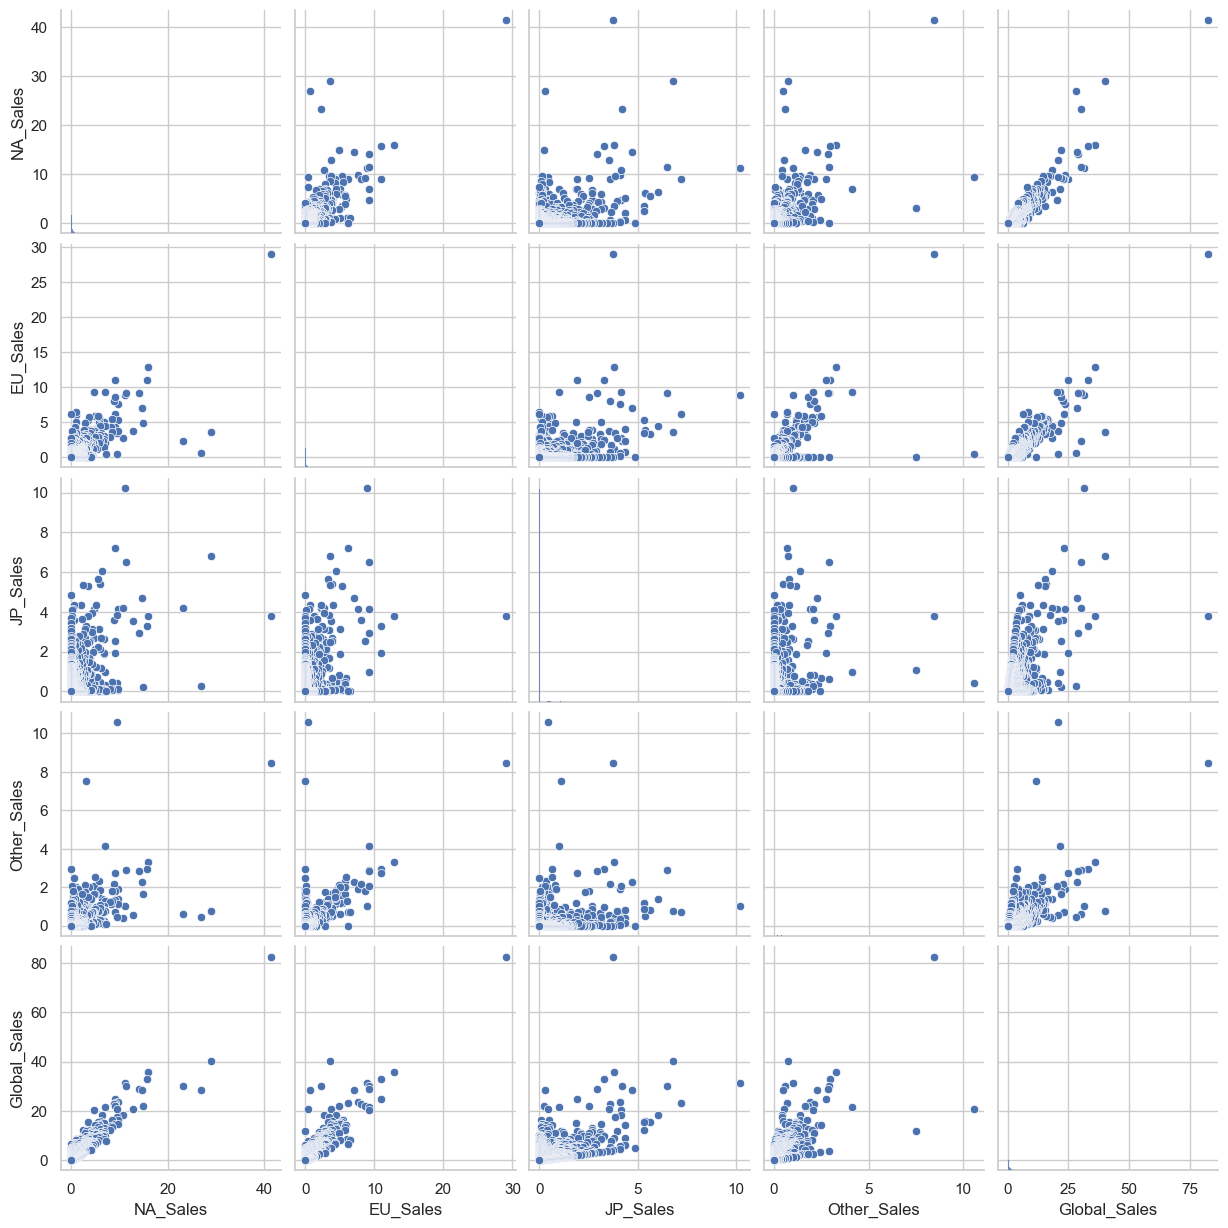

In [31]:
sns.pairplot(df)

In [36]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(25,25))
plt.plot(df['Name'].head(10), df['NA_Sales'].head(10), color='red', label='N.America_Sales')
plt.plot(df['Name'].head(10), df['JP_Sales'].head(10), color ='pink', label='Japan_Sales')
plt.plot(df['Name'].head(10), df['EU_Sales'].head(10), color='yellow', label='Europe_Sales')
plt.tight_layout()
plt.legend()
plt.xlabel('Jeux vidéos les plus vendus')
plt.ylabel('Ventes')
plt.title('Popularité des 10 jeux les plus vendus');

In [37]:
#filtering out EA sports and Nintendo to compare which company dominates
Nin = (df['Publisher']=='Nintendo')
EA = (df['Publisher']=='Electronic Arts')

In [39]:
#Nintendo sales across various regions
print(df['JP_Sales'][Nin].sum())
print(df['EU_Sales'][Nin].sum())
print(df['NA_Sales'][Nin].sum())
print(df['Global_Sales'][Nin].sum())

455.4200000000001
418.7399999999999
816.8699999999999
1786.5600000000002


In [40]:
#EA sales across various regions
print(df['JP_Sales'][EA].sum())
print(df['EU_Sales'][EA].sum())
print(df['NA_Sales'][EA].sum())
print(df['Global_Sales'][EA].sum())

14.04
371.27
595.07
1110.3200000000002


In [46]:
df2006=df[df.Year==2015]
df2006=df2006.sort_values('Global_Sales',ascending=False).head(5)
df2006

Empty DataFrame
Columns: [Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, cat_Year, cat_NA_Sales, cat_EU_Sales, cat_JP_Sales, cat_Other_Sales, cat_Global_Sales]
Index: []

In [50]:
import plotly.express as px
import plotly.graph_objects as go

figure=px.bar(df2006,x='Name',y='Global_Sales',
             title="Best selling games")
figure.show()

In [51]:
genre=df.groupby('Genre').sum()['Global_Sales'].reset_index()
genre=genre.sort_values('Global_Sales',ascending=False).head(5)
genre

Genre  Global_Sales
0         Action       1751.18
10        Sports       1330.93
8        Shooter       1037.37
7   Role-Playing        927.37
4       Platform        831.37

In [101]:
figure4=px.bar(genre,x='Genre',y='Global_Sales',
              title="Genres qui ont le plus de ventes")
figure4.show()

In [56]:
#Best performing platforms
platform=df.groupby('Platform').sum()['Global_Sales'].reset_index()
platform=platform.sort_values('Global_Sales',ascending=False).head(5)
platform

Platform  Global_Sales
16      PS2       1255.64
28     X360        979.96
17      PS3        957.84
26      Wii        926.71
4        DS        822.49

In [93]:
figure2=px.bar(platform,x='Platform',y='Global_Sales',
              title="Plateformes qui ont le plus de ventes")
figure2.show()

In [58]:
publisher=df.groupby('Publisher').sum()['Global_Sales'].reset_index()
publisher=publisher.sort_values('Global_Sales',ascending=False).head(5)
publisher

Publisher  Global_Sales
359                     Nintendo       1786.56
138              Electronic Arts       1110.32
21                    Activision        727.46
456  Sony Computer Entertainment        607.50
525                      Ubisoft        474.72

In [95]:
figure13=px.bar(publisher,x='Publisher',y='Global_Sales',
              title="Editeurs qui ont les meilleurs ventes")
figure13.show()

In [60]:
#Top 3 publishers in Japan, Europe, North America & Other parts of the world
pubreg=df.groupby('Publisher').agg({'JP_Sales':'sum','EU_Sales':'sum','NA_Sales':'sum','Other_Sales':'sum'})
pubreg=pubreg.sort_values('NA_Sales',ascending=False).head(3)
pubreg

JP_Sales  EU_Sales  NA_Sales  Other_Sales
Publisher                                                 
Nintendo           455.42    418.74    816.87        95.33
Electronic Arts     14.04    371.27    595.07       129.77
Activision           6.54    215.53    429.70        75.34

In [99]:
pubreg.plot(kind='bar',figsize=(15,8))
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.title("Ventes de jeux videos par Region en fonction de l'Editeur");

In [63]:
#Best performing platforms in all regions
platreg=df.groupby('Platform').agg({'JP_Sales':'sum','EU_Sales':'sum','NA_Sales':'sum','Other_Sales':'sum'})
platreg=platreg.sort_values('NA_Sales',ascending=False).head(5)
platreg

JP_Sales  EU_Sales  NA_Sales  Other_Sales
Platform                                           
X360         12.43    280.58    601.05        85.54
PS2         139.20    339.29    583.84       193.44
Wii          69.35    268.38    507.71        80.61
PS3          79.99    343.71    392.26       141.93
DS          175.57    194.65    390.71        60.53

In [100]:
platreg.plot(kind='bar',figsize=(15,8))
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.title('Meilleurs ventes de jeux videos par Region en fonction de la Plateforme')

Text(0.5, 1.0, 'Meilleurs ventes de jeux videos par Region en fonction de la Plateforme')

In [65]:
x=(df['NA_Sales'].mean()*1000000)
y=(df['EU_Sales'].mean()*1000000)
z=(df['JP_Sales'].mean()*1000000)
q=(df['Other_Sales'].mean()*1000000)
p=(df['Global_Sales'].mean()*1000000)

print("The average sales in North America =", (f"${x:,.3f}")) #comma separated values till 3 decimal place and $ sign
print("The average sales in Europe =",(f"${y:,.3f}"))
print("The average sales in Japan =",(f"${z:,.3f}"))
print("The average sales in other regions =",(f"${q:,.3f}"))
print("The average sales globally =",(f"${p:,.3f}"))


The average sales in North America = $264,667.430
The average sales in Europe = $146,652.006
The average sales in Japan = $77,781.660
The average sales in other regions = $48,063.020
The average sales globally = $537,440.656


In [66]:
colors = ['lightslategray',] * 4
colors[1]='darkgray'
colors[2]='grey'
colors[3]='dimgrey'
colors[0] = 'crimson'

bar1 = go.Figure(data=[go.Bar(
    y=['Global','North America', 'Europe', 'Japan',
       'Other'],
    x=[537440.656,264667.430, 146652.006, 77781.660, 48063.020],
    orientation='h',
    marker_color=colors # marker color can be a single color value or an iterable
)])
bar1.update_layout(title_text='Region with highest sales on an average')
bar1.update_xaxes(title='Average Sales')
bar1.update_yaxes(title='Regions')

In [68]:
#Grouping the north america sales based on each platform
data2 = pd.DataFrame(df.groupby("Platform")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index())
data2.rename(columns = {'Platform':'Platform_NA'}, inplace = True)

#Grouping the europe sales based on each platform
data3 = pd.DataFrame(df.groupby("Platform")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index())
data3.rename(columns = {'Platform':'Platform_EU'}, inplace = True)

#Grouping the japan sales based on each platform
data4 = pd.DataFrame(df.groupby("Platform")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index())
data4.rename(columns = {'Platform':'Platform_JP'}, inplace = True)

#Grouping the other region sales based on each platform
data5 = pd.DataFrame(df.groupby("Platform")[["Other_Sales"]].sum().sort_values(by=['Other_Sales'],ascending=[False]).reset_index())
data5.rename(columns = {'Platform':'Platform_other'}, inplace = True)

#Concatenating our datasets
data=pd.concat([data2,data3,data4,data5],axis=1)
data.head(3)

Platform_NA  NA_Sales Platform_EU  EU_Sales Platform_JP  JP_Sales  \
0        X360    601.05         PS3    343.71          DS    175.57   
1         PS2    583.84         PS2    339.29          PS    139.82   
2         Wii    507.71        X360    280.58         PS2    139.20   

  Platform_other  Other_Sales  
0            PS2       193.44  
1            PS3       141.93  
2           X360        85.54

In [102]:
from plotly.subplots import make_subplots #import new library

subplot1 = make_subplots(rows=4, cols=1, shared_yaxes=True,subplot_titles=("North America top platforms","Europe top platforms","Japan top platforms","Other regions top platforms"))

#Subplot for North America
subplot1.add_trace(go.Bar(x=data['Platform_NA'], y=data['NA_Sales'],
                    marker=dict(color=[1, 2, 3],coloraxis="coloraxis")),1, 1)

#Subplot for Europe
subplot1.add_trace(go.Bar(x=data['Platform_EU'], y=data['EU_Sales'],
                    marker=dict(color=[4, 5, 6], coloraxis="coloraxis")),                         2, 1)
                   
#Subplot for Japan
subplot1.add_trace(go.Bar(x=data['Platform_JP'], y=data['JP_Sales'],
                    marker=dict(color=[7, 8, 9], coloraxis="coloraxis")),
                    3, 1)

##Subplot for Other Regions
subplot1.add_trace(go.Bar(x=data['Platform_other'], y=data['Other_Sales'],
                    marker=dict(color=[10, 11, 12], coloraxis="coloraxis")),
                   4, 1)
                   
subplot1.update_layout(height=900,width=500,coloraxis=dict(colorscale='Magenta'), showlegend=False)
subplot1.show()

In [70]:
top = pd.DataFrame(df.groupby("Name")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
top.head(10) #Printing the top 10 results

Name  Global_Sales
0                      Wii Sports         82.74
1              Grand Theft Auto V         55.92
2               Super Mario Bros.         45.31
3                          Tetris         35.84
4                  Mario Kart Wii         35.82
5               Wii Sports Resort         33.00
6        Pokemon Red/Pokemon Blue         31.37
7         Call of Duty: Black Ops         31.03
8  Call of Duty: Modern Warfare 3         30.83
9           New Super Mario Bros.         30.01

In [71]:
pie1 = px.pie(top, values=top['Global_Sales'][:10], names=top['Name'][:10],title='Top 10 games globally', 
              color_discrete_sequence=px.colors.sequential.Purp_r)
pie1.update_traces(textposition='inside', textinfo='percent+label',showlegend=False)

pie1.show()

In [72]:
name2 = pd.DataFrame(df.groupby("Name")[["NA_Sales"]].mean().sort_values(by=['NA_Sales'],ascending=[False]).reset_index())
name2.rename(columns = {'Name':'Name_NA'}, inplace = True)

name3 = pd.DataFrame(df.groupby("Name")[["EU_Sales"]].mean().sort_values(by=['EU_Sales'],ascending=[False]).reset_index())
name3.rename(columns = {'Name':'Name_EU'}, inplace = True)

name4 = pd.DataFrame(df.groupby("Name")[["JP_Sales"]].mean().sort_values(by=['JP_Sales'],ascending=[False]).reset_index())
name4.rename(columns = {'Name':'Name_JP'}, inplace = True)

name5 = pd.DataFrame(df.groupby("Name")[["Other_Sales"]].mean().sort_values(by=['Other_Sales'],ascending=[False]).reset_index())
name5.rename(columns = {'Name':'Name_other'}, inplace = True)

#Concatenating the results.
name_df=pd.concat([name2,name3,name4,name5],axis=1)

In [73]:
subplot_name1 = make_subplots(rows=4, cols=1, shared_yaxes=True,subplot_titles=("North American top games","Europe top games", "Japan top games","Other regions top games",'Top games globally'))

#Subplot for North America
subplot_name1.add_trace(go.Bar(x=name_df['Name_NA'][:5], y=name_df['NA_Sales'][:5],marker=dict(color=[1, 2, 3],coloraxis="coloraxis")),1, 1)

#Subplot for Europe
subplot_name1.add_trace(go.Bar(x=name_df['Name_EU'][:5], y=name_df['EU_Sales'][:5],marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 2, 1)

#Subplot for Japan
subplot_name1.add_trace(go.Bar(x=name_df['Name_JP'][:5], y=name_df['JP_Sales'][:5],marker=dict(color=[7, 8, 9], coloraxis="coloraxis")),3, 1)

#Subplot for other regions
subplot_name1.add_trace(go.Bar(x=name_df['Name_other'][:5], y=name_df['Other_Sales'][:5],marker=dict(color=[10, 11, 12], coloraxis="coloraxis")),4, 1)

subplot_name1.update_layout(height=1000,width=500,coloraxis=dict(colorscale='Mint_r'), showlegend=False)
subplot_name1.update_xaxes(tickangle=45)
subplot_name1.show()

In [74]:
old_games = pd.DataFrame(df.query('Year<2000', inplace=False))

In [75]:
import numpy as np #import library
a=old_games['Global_Sales']
np.percentile(a, [99])

array([7.8235])

In [76]:
old_games.query('Global_Sales>7.8235', inplace=False)

Name Platform       Year  \
Rank                                                                
2                           Super Mario Bros.      NES 1985-01-01   
5                    Pokemon Red/Pokemon Blue       GB 1996-01-01   
6                                      Tetris       GB 1989-01-01   
10                                  Duck Hunt      NES 1984-01-01   
13                Pokemon Gold/Pokemon Silver       GB 1999-01-01   
19                          Super Mario World     SNES 1990-01-01   
22                           Super Mario Land       GB 1989-01-01   
23                        Super Mario Bros. 3      NES 1988-01-01   
31    Pokémon Yellow: Special Pikachu Edition       GB 1998-01-01   
47                             Super Mario 64      N64 1996-01-01   
51         Super Mario Land 2: 6 Golden Coins       GB 1992-01-01   
53                               Gran Turismo       PS 1997-01-01   
58                      Super Mario All-Stars     SNES 1993-01-01   
64                              Mario Kart 64      N64 1996-01-01   
67                          Final Fantasy VII       PS 1997-01-01   
70                             Gran Turismo 2       PS 1999-01-01   
72                        Donkey Kong Country     SNES 1994-01-01   
77                           Super Mario Kart     SNES 1992-01-01   
85                              GoldenEye 007      N64 1997-01-01   
88                         Final Fantasy VIII       PS 1999-01-01   

             Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
Rank                                                                            
2         Platform                     Nintendo     29.08      3.58      6.81   
5     Role-Playing                     Nintendo     11.27      8.89     10.22   
6           Puzzle                     Nintendo     23.20      2.26      4.22   
10         Shooter                     Nintendo     26.93      0.63      0.28   
13    Role-Playing                     Nintendo      9.00      6.18      7.20   
19        Platform                     Nintendo     12.78      3.75      3.54   
22        Platform                     Nintendo     10.83      2.71      4.18   
23        Platform                     Nintendo      9.54      3.44      3.84   
31    Role-Playing                     Nintendo      5.89      5.04      3.12   
47        Platform                     Nintendo      6.91      2.85      1.91   
51       Adventure                     Nintendo      6.16      2.04      2.69   
53          Racing  Sony Computer Entertainment      4.02      3.87      2.54   
58        Platform                     Nintendo      5.99      2.15      2.12   
64          Racing                     Nintendo      5.55      1.94      2.23   
67    Role-Playing  Sony Computer Entertainment      3.01      2.47      3.28   
70          Racing  Sony Computer Entertainment      3.88      3.42      1.69   
72        Platform                     Nintendo      4.36      1.71      3.00   
77          Racing                     Nintendo      3.54      1.24      3.81   
85         Shooter                     Nintendo      5.80      2.01      0.13   
88    Role-Playing                   SquareSoft      2.28      1.72      3.63   

      Other_Sales  Global_Sales                                     cat_Year  \
Rank                                                                           
2            0.77         40.24  (1979-12-31 23:59:59.999999999, 2003-01-01]   
5            1.00         31.37  (1979-12-31 23:59:59.999999999, 2003-01-01]   
6            0.58         30.26  (1979-12-31 23:59:59.999999999, 2003-01-01]   
10           0.47         28.31  (1979-12-31 23:59:59.999999999, 2003-01-01]   
13           0.71         23.10  (1979-12-31 23:59:59.999999999, 2003-01-01]   
19           0.55         20.61  (1979-12-31 23:59:59.999999999, 2003-01-01]   
22           0.42         18.14  (1979-12-31 23:59:59.999999999, 2003-01-01]   
23           0.46  

In [77]:
genre_df = df.groupby("Genre")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index()
genre_df #print the dataframe

Genre  Global_Sales
0         Action       1751.18
1         Sports       1330.93
2        Shooter       1037.37
3   Role-Playing        927.37
4       Platform        831.37
5           Misc        809.96
6         Racing        732.04
7       Fighting        448.91
8     Simulation        392.20
9         Puzzle        244.95
10     Adventure        239.04
11      Strategy        175.12

In [107]:
bar_genre= px.bar(genre_df, x='Genre', y='Global_Sales',color='Global_Sales',color_continuous_scale='Burgyl')
bar_genre.show()

In [108]:
bar_publisher= px.bar(publisher_df.head(10), x='Publisher', y='Global_Sales',color='Global_Sales',color_continuous_scale='Burgyl')
bar_publisher.show()

publisher_df2 = df.groupby("Publisher")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index()
bar_publisher2= px.bar(publisher_df2.head(10), x='Publisher', y='NA_Sales',color='NA_Sales',color_continuous_scale='Burgyl')
bar_publisher2.show()

publisher_df3 = df.groupby("Publisher")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index()
bar_publisher3= px.bar(publisher_df3.head(10), x='Publisher', y='JP_Sales',color='JP_Sales',color_continuous_scale='Burgyl')
bar_publisher3.show()

publisher_df4 = df.groupby("Publisher")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index()
bar_publisher4= px.bar(publisher_df4.head(10), x='Publisher', y='EU_Sales',color='EU_Sales',color_continuous_scale='Burgyl')
bar_publisher4.show()

publisher_df5 = df.groupby("Publisher")[["Other_Sales"]].sum().sort_values(by=['Other_Sales'],ascending=[False]).reset_index()
bar_publisher5= px.bar(publisher_df5.head(10), x='Publisher', y='Other_Sales',color='Other_Sales',color_continuous_scale='Burgyl')
bar_publisher5.show()

In [80]:
publisher_df = df.groupby("Publisher")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index()
publisher_df #print the dataframe

Publisher  Global_Sales
0                       Nintendo       1786.56
1                Electronic Arts       1110.32
2                     Activision        727.46
3    Sony Computer Entertainment        607.50
4                        Ubisoft        474.72
..                           ...           ...
573                    Ongakukan          0.01
574                     Commseed          0.01
575                       Takuyo          0.01
576                     Boost On          0.01
577                   Naxat Soft          0.01

[578 rows x 2 columns]